# Finetuning Comparison: GET vs GETDiffusion

This notebook compares finetuning performance between two architectures:
1. **GETDiffusion Model**: Finetuned from GETRegionDiffusion checkpoint
2. **GET Model**: Finetuned from GETRegionPretrain checkpoint

Both were finetuned on the PBMC dataset. We'll compare their training curves and performance metrics.


In [1]:
import sys
import os

# Add project root to Python path
PROJECT_ROOT = '/home/yoyomanzoor/Documents/get_multimodel'
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)
os.chdir(PROJECT_ROOT)


In [2]:
# Create results directory if it doesn't exist
RESULTS_DIR = 'results'
os.makedirs(RESULTS_DIR, exist_ok=True)
print(f"Results will be saved to: {os.path.abspath(RESULTS_DIR)}")


Results will be saved to: /home/yoyomanzoor/Documents/get_multimodel/results


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'sans-serif'
sns.set_style('whitegrid')


## Load Finetuning CSV Logs


In [4]:
# Paths to finetuning CSV log files
FINETUNE_DIR = "/home/yoyomanzoor/Crucial/get_data/output/finetune_pbmc10k_multiome_GET"

diffusion_log_path = os.path.join(FINETUNE_DIR, "finetune_from_GETDiffusion_checkpoint", 
                                   "csv_logs", "lightning_logs", "version_0", "metrics.csv")
transformer_log_path = os.path.join(FINETUNE_DIR, "finetune_from_GET_checkpoint",
                                     "csv_logs", "lightning_logs", "version_0", "metrics.csv")

print(f"GETDiffusion finetune log path: {diffusion_log_path}")
print(f"GETDiffusion log exists: {os.path.exists(diffusion_log_path)}")
print(f"\nGET finetune log path: {transformer_log_path}")
print(f"GET log exists: {os.path.exists(transformer_log_path)}")


GETDiffusion finetune log path: /home/yoyomanzoor/Crucial/get_data/output/finetune_pbmc10k_multiome_GET/finetune_from_GETDiffusion_checkpoint/csv_logs/lightning_logs/version_0/metrics.csv
GETDiffusion log exists: True

GET finetune log path: /home/yoyomanzoor/Crucial/get_data/output/finetune_pbmc10k_multiome_GET/finetune_from_GET_checkpoint/csv_logs/lightning_logs/version_0/metrics.csv
GET log exists: True


## Training Loss and Expression Pearson Correlation Comparison


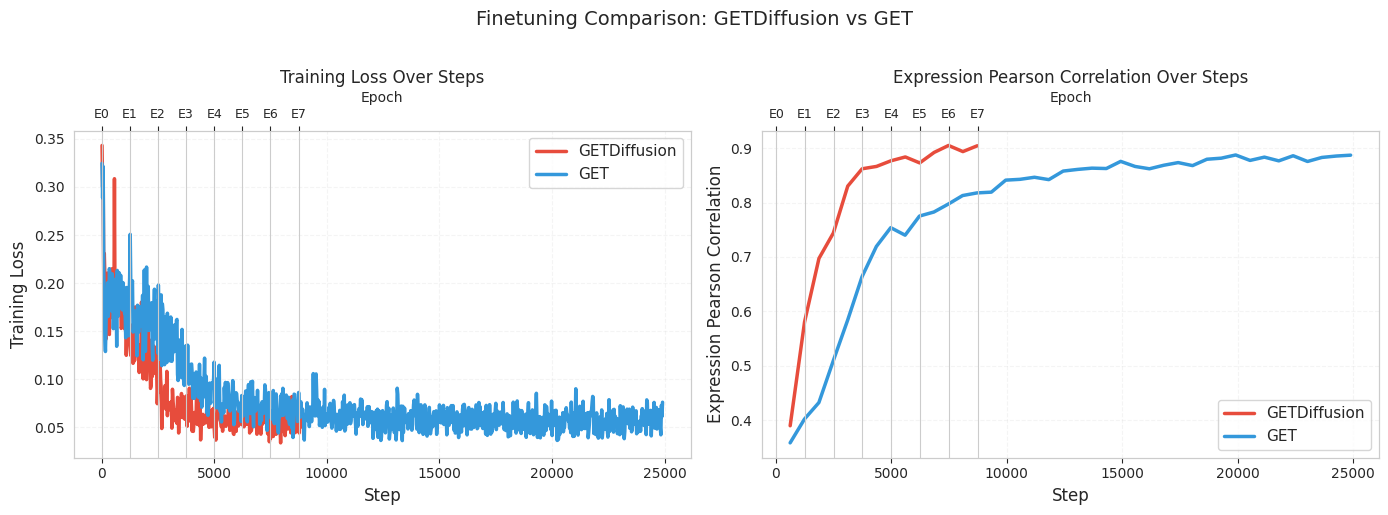


FINETUNING SUMMARY

GETDiffusion - Final Training Loss: 0.042021
GETDiffusion - Minimum Training Loss: 0.033608
GET - Final Training Loss: 0.075905
GET - Minimum Training Loss: 0.035948

GETDiffusion - Final Expression Pearson: 0.904441
GETDiffusion - Maximum Expression Pearson: 0.904971
GET - Final Expression Pearson: 0.887155
GET - Maximum Expression Pearson: 0.887519


In [5]:
# Load and plot training loss curves
if diffusion_log_path and os.path.exists(diffusion_log_path) and transformer_log_path and os.path.exists(transformer_log_path):
    # Load CSV logs
    df_diffusion = pd.read_csv(diffusion_log_path)
    df_transformer = pd.read_csv(transformer_log_path)
    
    # Create figure with subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plot training loss by step
    ax = axes[0]
    if 'step' in df_diffusion.columns and 'train_loss' in df_diffusion.columns:
        # Filter out NaN values
        df_diff_loss = df_diffusion[df_diffusion['train_loss'].notna()]
        if len(df_diff_loss) > 0:
            ax.plot(df_diff_loss['step'], df_diff_loss['train_loss'], 
                    label='GETDiffusion', color='#e74c3c', linewidth=2.5)
    if 'step' in df_transformer.columns and 'train_loss' in df_transformer.columns:
        # Filter out NaN values
        df_trans_loss = df_transformer[df_transformer['train_loss'].notna()]
        if len(df_trans_loss) > 0:
            ax.plot(df_trans_loss['step'], df_trans_loss['train_loss'], 
                    label='GET', color='#3498db', linewidth=2.5)
    ax.set_xlabel('Step', fontsize=12)
    ax.set_ylabel('Training Loss', fontsize=12)
    ax.set_title('Training Loss Over Steps', fontsize=12)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.2, linestyle='--')
    
    # Add epoch labels on secondary x-axis (use diffusion model for epoch markers)
    if 'epoch' in df_diffusion.columns and 'step' in df_diffusion.columns:
        # Get unique epochs and their corresponding step values
        epoch_steps = df_diffusion[df_diffusion['epoch'].notna()].groupby('epoch')['step'].first()
        if len(epoch_steps) > 0:
            ax2 = ax.twiny()
            ax2.set_xlim(ax.get_xlim())
            ax2.set_xticks(epoch_steps.values)
            ax2.set_xticklabels([f'E{int(e)}' for e in epoch_steps.index], fontsize=9)
            ax2.set_xlabel('Epoch', fontsize=10)
    
    # Plot exp_pearson by step (expression Pearson correlation)
    ax = axes[1]
    if 'step' in df_diffusion.columns and 'exp_pearson' in df_diffusion.columns:
        # Filter out NaN values
        df_diff_pearson = df_diffusion[df_diffusion['exp_pearson'].notna()]
        if len(df_diff_pearson) > 0:
            ax.plot(df_diff_pearson['step'], df_diff_pearson['exp_pearson'], 
                    label='GETDiffusion', color='#e74c3c', linewidth=2.5)
    if 'step' in df_transformer.columns and 'exp_pearson' in df_transformer.columns:
        # Filter out NaN values
        df_trans_pearson = df_transformer[df_transformer['exp_pearson'].notna()]
        if len(df_trans_pearson) > 0:
            ax.plot(df_trans_pearson['step'], df_trans_pearson['exp_pearson'], 
                    label='GET', color='#3498db', linewidth=2.5)
    ax.set_xlabel('Step', fontsize=12)
    ax.set_ylabel('Expression Pearson Correlation', fontsize=12)
    ax.set_title('Expression Pearson Correlation Over Steps', fontsize=12)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.2, linestyle='--')
    
    # Add epoch labels on secondary x-axis (use diffusion model for epoch markers)
    if 'epoch' in df_diffusion.columns and 'step' in df_diffusion.columns:
        # Get unique epochs and their corresponding step values
        epoch_steps = df_diffusion[df_diffusion['epoch'].notna()].groupby('epoch')['step'].first()
        if len(epoch_steps) > 0:
            ax2 = ax.twiny()
            ax2.set_xlim(ax.get_xlim())
            ax2.set_xticks(epoch_steps.values)
            ax2.set_xticklabels([f'E{int(e)}' for e in epoch_steps.index], fontsize=9)
            ax2.set_xlabel('Epoch', fontsize=10)
    
    plt.suptitle('Finetuning Comparison: GETDiffusion vs GET', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.savefig(f'{RESULTS_DIR}/finetune_training_loss_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Print summary statistics
    print("\n" + "="*70)
    print("FINETUNING SUMMARY")
    print("="*70)
    if 'train_loss' in df_diffusion.columns:
        df_diff_loss = df_diffusion[df_diffusion['train_loss'].notna()]
        if len(df_diff_loss) > 0:
            print(f"\nGETDiffusion - Final Training Loss: {df_diff_loss['train_loss'].iloc[-1]:.6f}")
            print(f"GETDiffusion - Minimum Training Loss: {df_diff_loss['train_loss'].min():.6f}")
    if 'train_loss' in df_transformer.columns:
        df_trans_loss = df_transformer[df_transformer['train_loss'].notna()]
        if len(df_trans_loss) > 0:
            print(f"GET - Final Training Loss: {df_trans_loss['train_loss'].iloc[-1]:.6f}")
            print(f"GET - Minimum Training Loss: {df_trans_loss['train_loss'].min():.6f}")
    if 'exp_pearson' in df_diffusion.columns:
        df_diff_pearson = df_diffusion[df_diffusion['exp_pearson'].notna()]
        if len(df_diff_pearson) > 0:
            print(f"\nGETDiffusion - Final Expression Pearson: {df_diff_pearson['exp_pearson'].iloc[-1]:.6f}")
            print(f"GETDiffusion - Maximum Expression Pearson: {df_diff_pearson['exp_pearson'].max():.6f}")
    if 'exp_pearson' in df_transformer.columns:
        df_trans_pearson = df_transformer[df_transformer['exp_pearson'].notna()]
        if len(df_trans_pearson) > 0:
            print(f"GET - Final Expression Pearson: {df_trans_pearson['exp_pearson'].iloc[-1]:.6f}")
            print(f"GET - Maximum Expression Pearson: {df_trans_pearson['exp_pearson'].max():.6f}")
        
elif diffusion_log_path and os.path.exists(diffusion_log_path):
    print("Found GETDiffusion logs but not GET logs. Plotting GETDiffusion only...")
    df_diffusion = pd.read_csv(diffusion_log_path)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plot training loss by step
    ax = axes[0]
    if 'step' in df_diffusion.columns and 'train_loss' in df_diffusion.columns:
        df_diff_loss = df_diffusion[df_diffusion['train_loss'].notna()]
        if len(df_diff_loss) > 0:
            ax.plot(df_diff_loss['step'], df_diff_loss['train_loss'], 
                    label='GETDiffusion', color='#e74c3c', linewidth=2.5)
    ax.set_xlabel('Step', fontsize=12)
    ax.set_ylabel('Training Loss', fontsize=12)
    ax.set_title('Training Loss Over Steps (GETDiffusion)', fontsize=12)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.2, linestyle='--')
    
    # Add epoch labels on secondary x-axis
    if 'epoch' in df_diffusion.columns and 'step' in df_diffusion.columns:
        epoch_steps = df_diffusion[df_diffusion['epoch'].notna()].groupby('epoch')['step'].first()
        if len(epoch_steps) > 0:
            ax2 = ax.twiny()
            ax2.set_xlim(ax.get_xlim())
            ax2.set_xticks(epoch_steps.values)
            ax2.set_xticklabels([f'E{int(e)}' for e in epoch_steps.index], fontsize=9)
            ax2.set_xlabel('Epoch', fontsize=10)
    
    # Plot exp_pearson by step
    ax = axes[1]
    if 'step' in df_diffusion.columns and 'exp_pearson' in df_diffusion.columns:
        df_diff_pearson = df_diffusion[df_diffusion['exp_pearson'].notna()]
        if len(df_diff_pearson) > 0:
            ax.plot(df_diff_pearson['step'], df_diff_pearson['exp_pearson'], 
                    label='GETDiffusion', color='#e74c3c', linewidth=2.5)
    ax.set_xlabel('Step', fontsize=12)
    ax.set_ylabel('Expression Pearson Correlation', fontsize=12)
    ax.set_title('Expression Pearson Correlation Over Steps (GETDiffusion)', fontsize=12)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.2, linestyle='--')
    
    # Add epoch labels on secondary x-axis
    if 'epoch' in df_diffusion.columns and 'step' in df_diffusion.columns:
        epoch_steps = df_diffusion[df_diffusion['epoch'].notna()].groupby('epoch')['step'].first()
        if len(epoch_steps) > 0:
            ax2 = ax.twiny()
            ax2.set_xlim(ax.get_xlim())
            ax2.set_xticks(epoch_steps.values)
            ax2.set_xticklabels([f'E{int(e)}' for e in epoch_steps.index], fontsize=9)
            ax2.set_xlabel('Epoch', fontsize=10)
    
    plt.suptitle('Finetuning: GETDiffusion', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.savefig(f'{RESULTS_DIR}/finetune_training_loss_getdiffusion.png', dpi=150, bbox_inches='tight')
    plt.show()
    
else:
    print("CSV log files not found. Please check the log file paths above.")
    print("\nTo generate this plot, ensure CSV log files exist at:")
    print(f"  - GETDiffusion: {diffusion_log_path}")
    print(f"  - GET: {transformer_log_path}")


## Additional Metrics Comparison

Compare other metrics like R² and Spearman correlation.


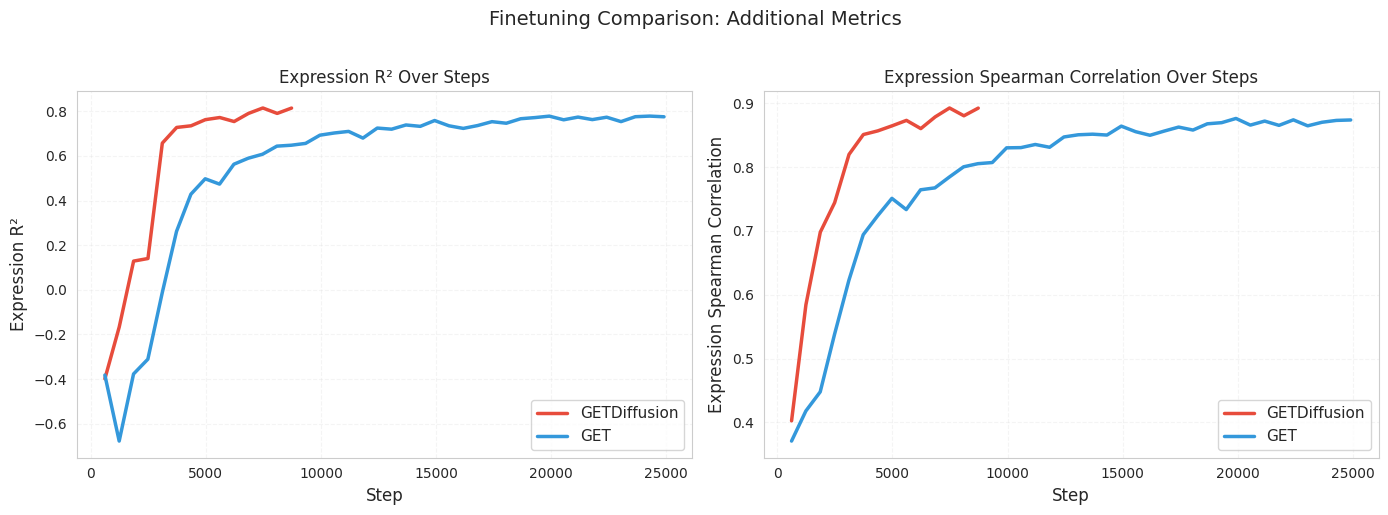


ADDITIONAL METRICS SUMMARY

GETDiffusion - Final Expression R²: 0.814609
GETDiffusion - Maximum Expression R²: 0.815031
GET - Final Expression R²: 0.775639
GET - Maximum Expression R²: 0.778677

GETDiffusion - Final Expression Spearman: 0.892259
GETDiffusion - Maximum Expression Spearman: 0.892462
GET - Final Expression Spearman: 0.873705
GET - Maximum Expression Spearman: 0.876080


In [6]:
# Plot additional metrics if available
if diffusion_log_path and os.path.exists(diffusion_log_path) and transformer_log_path and os.path.exists(transformer_log_path):
    df_diffusion = pd.read_csv(diffusion_log_path)
    df_transformer = pd.read_csv(transformer_log_path)
    
    # Create figure with subplots for additional metrics
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plot exp_r2 by step
    ax = axes[0]
    if 'step' in df_diffusion.columns and 'exp_r2' in df_diffusion.columns:
        df_diff_r2 = df_diffusion[df_diffusion['exp_r2'].notna()]
        if len(df_diff_r2) > 0:
            ax.plot(df_diff_r2['step'], df_diff_r2['exp_r2'], 
                    label='GETDiffusion', color='#e74c3c', linewidth=2.5)
    if 'step' in df_transformer.columns and 'exp_r2' in df_transformer.columns:
        df_trans_r2 = df_transformer[df_transformer['exp_r2'].notna()]
        if len(df_trans_r2) > 0:
            ax.plot(df_trans_r2['step'], df_trans_r2['exp_r2'], 
                    label='GET', color='#3498db', linewidth=2.5)
    ax.set_xlabel('Step', fontsize=12)
    ax.set_ylabel('Expression R²', fontsize=12)
    ax.set_title('Expression R² Over Steps', fontsize=12)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.2, linestyle='--')
    
    # Plot exp_spearman by step
    ax = axes[1]
    if 'step' in df_diffusion.columns and 'exp_spearman' in df_diffusion.columns:
        df_diff_spearman = df_diffusion[df_diffusion['exp_spearman'].notna()]
        if len(df_diff_spearman) > 0:
            ax.plot(df_diff_spearman['step'], df_diff_spearman['exp_spearman'], 
                    label='GETDiffusion', color='#e74c3c', linewidth=2.5)
    if 'step' in df_transformer.columns and 'exp_spearman' in df_transformer.columns:
        df_trans_spearman = df_transformer[df_transformer['exp_spearman'].notna()]
        if len(df_trans_spearman) > 0:
            ax.plot(df_trans_spearman['step'], df_trans_spearman['exp_spearman'], 
                    label='GET', color='#3498db', linewidth=2.5)
    ax.set_xlabel('Step', fontsize=12)
    ax.set_ylabel('Expression Spearman Correlation', fontsize=12)
    ax.set_title('Expression Spearman Correlation Over Steps', fontsize=12)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.2, linestyle='--')
    
    plt.suptitle('Finetuning Comparison: Additional Metrics', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.savefig(f'{RESULTS_DIR}/finetune_additional_metrics_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Print summary for additional metrics
    print("\n" + "="*70)
    print("ADDITIONAL METRICS SUMMARY")
    print("="*70)
    if 'exp_r2' in df_diffusion.columns:
        df_diff_r2 = df_diffusion[df_diffusion['exp_r2'].notna()]
        if len(df_diff_r2) > 0:
            print(f"\nGETDiffusion - Final Expression R²: {df_diff_r2['exp_r2'].iloc[-1]:.6f}")
            print(f"GETDiffusion - Maximum Expression R²: {df_diff_r2['exp_r2'].max():.6f}")
    if 'exp_r2' in df_transformer.columns:
        df_trans_r2 = df_transformer[df_transformer['exp_r2'].notna()]
        if len(df_trans_r2) > 0:
            print(f"GET - Final Expression R²: {df_trans_r2['exp_r2'].iloc[-1]:.6f}")
            print(f"GET - Maximum Expression R²: {df_trans_r2['exp_r2'].max():.6f}")
    if 'exp_spearman' in df_diffusion.columns:
        df_diff_spearman = df_diffusion[df_diffusion['exp_spearman'].notna()]
        if len(df_diff_spearman) > 0:
            print(f"\nGETDiffusion - Final Expression Spearman: {df_diff_spearman['exp_spearman'].iloc[-1]:.6f}")
            print(f"GETDiffusion - Maximum Expression Spearman: {df_diff_spearman['exp_spearman'].max():.6f}")
    if 'exp_spearman' in df_transformer.columns:
        df_trans_spearman = df_transformer[df_transformer['exp_spearman'].notna()]
        if len(df_trans_spearman) > 0:
            print(f"GET - Final Expression Spearman: {df_trans_spearman['exp_spearman'].iloc[-1]:.6f}")
            print(f"GET - Maximum Expression Spearman: {df_trans_spearman['exp_spearman'].max():.6f}")
else:
    print("Cannot create additional metrics plots - CSV files not found.")
